In [15]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from conv_net import Net

In [16]:
import torch.optim as optim
from torch.nn import CrossEntropyLoss

In [17]:
# 1. Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
train_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAutocontrast(),
    transforms.RandomRotation(45),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

In [19]:
train_dataset = ImageFolder("data/cloud_train", transform=train_transform)
test_dataset = ImageFolder("data/cloud_test", transform=test_transform)

In [22]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4)

image, label = next(iter(train_loader))
print(image.shape)

torch.Size([4, 3, 128, 128])


In [ ]:
# image = image.squeeze().permute(1,2,0)
# print("New image shape: ",image.shape)

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 4 is not equal to len(dims) = 3

In [23]:
# plt.imshow(image)
# plt.axis(False)
# plt.show()

In [28]:
# Model:
num_classes = len(train_dataset.classes)

from conv_net import Net
model = Net(num_classes=num_classes).to(device)



In [29]:
criterion = CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.001)

In [30]:
epochs = 20
for epoch in range(epochs):
    model.train()
    train_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Evaluation
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.inference_mode():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"  Train Loss: {train_loss / len(train_loader):.4f}")
    print(f"  Test Loss: {test_loss / len(test_loader):.4f}")
    print(f"  Test Accuracy: {100 * correct / total:.2f}%")

Epoch 1/20
  Train Loss: 1.2717
  Test Loss: 0.6283
  Test Accuracy: 69.67%
Epoch 2/20
  Train Loss: 0.7100
  Test Loss: 0.6305
  Test Accuracy: 68.85%
Epoch 3/20
  Train Loss: 0.6960
  Test Loss: 0.5277
  Test Accuracy: 78.69%
Epoch 4/20
  Train Loss: 0.6620
  Test Loss: 0.6534
  Test Accuracy: 60.66%
Epoch 5/20
  Train Loss: 0.7462
  Test Loss: 0.6516
  Test Accuracy: 71.31%
Epoch 6/20
  Train Loss: 0.7453
  Test Loss: 0.5050
  Test Accuracy: 72.13%
Epoch 7/20
  Train Loss: 0.6776
  Test Loss: 0.6710
  Test Accuracy: 54.10%
Epoch 8/20
  Train Loss: 0.7182
  Test Loss: 0.6643
  Test Accuracy: 59.02%
Epoch 9/20
  Train Loss: 0.7240
  Test Loss: 0.5264
  Test Accuracy: 75.41%
Epoch 10/20
  Train Loss: 0.6727
  Test Loss: 0.8039
  Test Accuracy: 58.20%
Epoch 11/20
  Train Loss: 0.7054
  Test Loss: 0.5088
  Test Accuracy: 77.87%
Epoch 12/20
  Train Loss: 0.7481
  Test Loss: 0.7301
  Test Accuracy: 54.92%
Epoch 13/20
  Train Loss: 0.6408
  Test Loss: 0.5814
  Test Accuracy: 68.03%
Epoch 14

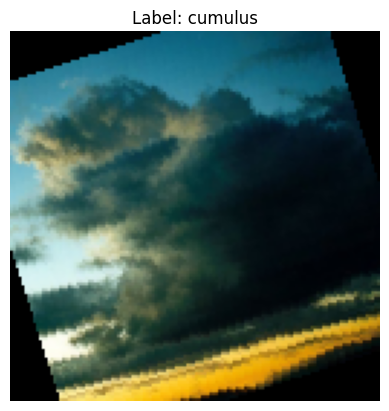

In [32]:
image_batch, label_batch = next(iter(train_loader))
img = image_batch[0].permute(1, 2, 0)  # shape [C,H,W] → [H,W,C]
plt.imshow(img)
plt.title(f"Label: {train_dataset.classes[label_batch[0]]}")
plt.axis(False)
plt.show()
